# PHYS 267 - Assignment 8
###### Last Updated: March 12, 2023 by Dr. Brenda Lee
***

### Question 1

Make a list of different statistics tests we have gone through in the Chapter 9 workbook. Create a table of when to use which test that is easily understood. This table will be useful to you in the future. You **must** include the Python package/function that allows you to perform this test. It may be submitted as a Word document or as an HTML table here, or handwritten as a separate attachment to your submission.

Total Marks: 4

#### Solution

| Test | Python Package/Function | When to Use |
| --- | --- | --- |
| T-test one-sample | `scipy.stats.ttest_1samp` | Compare means of one groups |
| Paired t-test | `scipy.stats.ttest_rel` | Compare means of two related groups |
| Unpaired t-test | `scipy.stats.ttest_ind` | Compare means of two independent groups |
| Chi squared test | `scipy.stats.chi2_contingency` | Compare observed and expected frequencies |
| F-test | `scipy.stats.f_oneway` | Compare variances of two or more groups |
| One-Sample Wilcoxon Signed Rank Sum Test | `scipy.stats.wilcoxon` | Compare the median of a sample to a given value |
| Mann-Whitney test | `scipy.stats.mannwhitneyu` | Compare medians of two independent groups |
| One-way ANOVA | `scipy.stats.f_oneway` | Compare means of more than two groups |
| Kruskal-Wallis Test | `scipy.stats.kruskal` | Compare medians of more than two groups |


### Question 2

A poll has been created and 20 responses collected from each of five age groups: <15, 15-30, 30-45, 45-60, >60. The University of Waterloo wants to know if their population wants to continue working from home during the pandemic. The questionnaire states "Working and learning from home will benefit University of Waterloo employees and students during the pandemic." The possible answers are:
(1) Strongly Agree, (2) Agree, (3) Disagree, (4) Strongly Disagree

The University wants to find out if the age of people influenced feelings about their preferences, particularly of those who felt negatievly (ie. "disagreed" or "strongly disagreed") about working/learning from home.

<table>
    <tr>
        <th>Age Group (Type)</th>
        <th>Frequency of Negative Responses (Observed Values)</th>
    </tr>
    <tr>
        <td>Less than 15</td>
        <td>4</td>
    </tr>
    <tr>
        <td>15-30</td>
        <td>6</td>
    </tr>
    <tr>
        <td>30-45</td>
        <td>14</td>
    </tr>
    <tr>
        <td>45-60</td>
        <td>10</td>
    </tr>
    <tr>
        <td>Greater than 60</td>
        <td>16</td>
    </tr>
</table>

These categories seem to show that there is a large difference of opinion between the groups. Answer the following questions:
1. What kind of test would you use for this? What is the hypothesis or null hypothesis? [2 marks]
2. Are these differences significant? State all relevant values and then make your inference. [5 marks]
3. How many degrees of freedom does the resulting analysis have? Explain. [2 marks]

Total Marks: 9

#### Solution

# Part 1
since we are looking at association of age with given negative opinion we can use the chi square test. Mainly because number of opinions are like frequencies for categorical age groups.

Our Null Hypothesis: There is no association between age and negative opinions on Working from home
Hypothesis: There is an association with negatie opinions and age

In [4]:
# Part 2
import numpy as np
import scipy.stats as stats

Dataset = [4,6,14,10,16]
t_value, p_value = stats.chisquare(Dataset)
if p_value < 0.05:
    print("Difference is age group is significant since p is =", p_value)
else:
    print("Difference is age group is Not significant since p is =", p_value)

Difference is age group is significant since p is = 0.03420269940871678


In [5]:
# Part 3
# dof =  (n-1)
dof = len(Dataset)-1
print("The chisquared test has a DOF =", dof)

The chisquared test has a DOF = 4


### Question 3

The recommended number of study hours per course in a week at the University of Waterloo is 7 hours. Many students were polled between two programs: Physics and Arts. They were asked to report their average study hours per course throughout one week. Answer the following questions:
1. The student's program and their average weekly number of study hours per course is given in the TXT file A8_Q3.txt. Present a graph of the distribution (whichever one displays the data most clearly). [3 marks]
2. Pick a suitable test and determine whether the average weekly study hours per course is significantly different than the recommended value of 7 hours. Explain why you are using the test, perform the test using Python code, report the results, and interpret your results to draw a conclusion. [6 marks]
3. Now, we want to compare between programs. Do Physics students study more than Arts students, significantly? Once again, pick and explain why you are using the test, perform the test using Python code, report the results, and interpret your results to draw a conclusion. [6 marks]

Total Marks: 15 marks

#### Solution

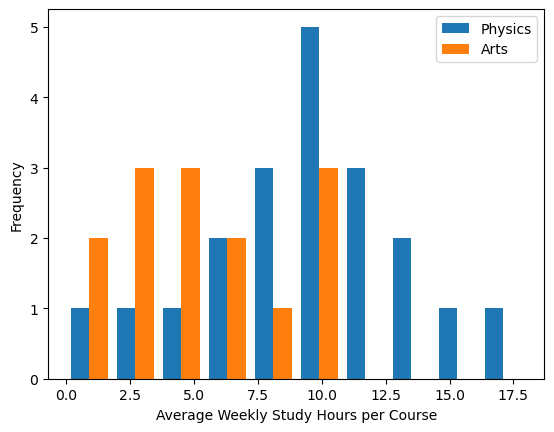

In [9]:
# Part 1 - Graph
import matplotlib.pyplot as plt

Physics = [1, 14, 6, 9, 3, 9, 13, 10, 10, 8, 5, 11, 12, 18, 9, 7, 8, 15, 11, 8]
Arts = [0, 1, 3, 5, 10, 6, 4, 8, 5, 9, 3, 2, 7, 9]

fig, ax = plt.subplots()
ax.hist([Physics,Arts])
ax.legend(labels= ["Physics","Arts"])
ax.set_xlabel('Average Weekly Study Hours per Course')
ax.set_ylabel('Frequency')
plt.show()


In [14]:
# Part 2 - Compare with Recommended 7 Hours
# Null Hypothesis: Average sleeping hours is not significantly different from 7 hrs
# Hypothesis: Average sleeping hours is Significantly different from 7 hrs


from scipy.stats import ttest_1samp

# Read data from file
data = np.genfromtxt('A8_Q3.txt', delimiter='\t', skip_header=True, usecols=1) # genform allows for reading strings and values

# Perform one-sample t-test
t_stat, p_val = ttest_1samp(data, 7)

# Print results
print("t-statistic: ", t_stat)
print("p-value: ", p_val)


if p_val < 0.05:
    print("Reject the null hypothesis, implying Average sleeping hours is significantly different from 7")
else:
    print("Fail to reject the null hypothesis, implying sleeping hour is not significantly different from 7hrs (closer to 7)")


t-statistic:  0.8575596540831916
p-value:  0.39732115289987957
Fail to reject the null hypothesis, implying sleeping hour is not significantly different from 7hrs (closer to 7)


In [18]:
# Part 3 - Compare Two Groups
# use two-sample t-tests
# Null Hypothesis: There's no difference between Physics and Arts sleeping hours
# Hypothesis: There is a significant difference between the 2 program's sleeping hours



# Perform two-sample t-test
t_stat2, p_val2 = stats.ttest_ind(Physics, Arts)

# Print results
print("t-statistic: ", t_stat2)
print("p-value: ", p_val2)


if p_val2 < 0.05:
    print("Reject the null hypothesis; There's a difference in sleeping hours")
else:
    print("Fail to reject the null hypothesis, there's no significant difference in sleeping hours")



t-statistic:  3.2698435571578384
p-value:  0.0025768741280226604
Reject the null hypothesis; There's a difference in sleeping hours
